### 1. 
In a theoretical simple linear regression model, the predictor variable (x) is used to predict the outcome variable (y). The intercept represents the outcome variable when the predictor variable is 0, while the slope coefficient indicates the amount that the outcome variable changes with a proportional change in the predictor variable. The error term accounts for random variation in y that cannot be explained by x. In a simple linear regression model, we assume that the error follows a normal distribution with a mean of 0 and some variance. 

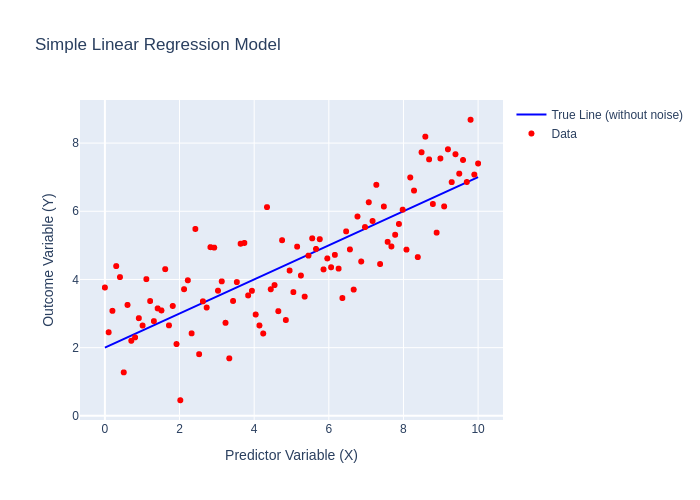

In [8]:
# visualization of sample lin reg
import numpy as np
import plotly.graph_objects as go

# Parameters for the model
np.random.seed(0)  # For reproducibility
beta_0 = 2       # Intercept
beta_1 = 0.5     # Slope
sigma = 1.0      # Standard deviation of the error term

# Generate predictor variable (X) as random values
X = np.linspace(0, 10, 100)

# Calculate the true linear relationship without noise
Y_true = beta_0 + beta_1 * X

# Generate error term (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, size=X.shape)

# Calculate outcome variable (Y) by adding noise to the linear relationship
Y = Y_true + epsilon

# Create a plotly figure
fig = go.Figure()

# Add the true line (without noise)
fig.add_trace(go.Scatter(x=X, y=Y_true, mode='lines', name='True Line (without noise)', line=dict(color='blue')))

# Add the noisy data points (with noise)
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name='Data', marker=dict(color='red')))

# Customize layout
fig.update_layout(
    title="Simple Linear Regression Model",
    xaxis_title="Predictor Variable (X)",
    yaxis_title="Outcome Variable (Y)"
)

fig.show(renderer='png')


Summary so far: Here's a quick summary of our discussion so far:

Simple Linear Regression Model: We covered the theoretical basics, describing the components of the model:

Predictor Variable (X): The independent variable used for predictions.
Outcome Variable (Y): The dependent variable we aim to predict.
Slope (𝛽1) and Intercept (β0): Define the linear relationship.
Error Term (𝜖): Represents randomness or noise in 𝑌 and is assumed to be normally distributed with mean zero. Together, these components combine to form a sample where Y is normally distributed around the line defined by 𝑋.

Python Code in Numpy & Scipy.stats: I provided code using numpy and matplotlib.pyplot to demonstrate the relationship visually:

We created predictor values and calculated the corresponding 
𝑌 values based on the linear relationship.Added noise to represent the error term. Plotted the "true" line and scattered points around it, illustrating how noise impacts observed 𝑌 values.
Plotly Visualization: We adapted the visualization to plotly.graph_objects for interactive plotting.

Code shows the true line and noisy data points.
I included instructions for rendering the figure as a PNG using kaleido, which can be installed with pip install kaleido.
This combination of theory and code should help you understand the structure and output of a simple linear regression model, both visually and practically. Let me know if you'd like to go deeper into any aspect!

Link:https://chatgpt.com/share/672a4b37-be08-800f-b55c-c09c7ebb43fc

### 2.
Before we knew the true values of B1 and B0, but now we are going to attempt to derive them using OLS and our generated data. 

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     182.7
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           3.98e-24
Time:                        16:58:11   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2085      0.201     10.968      0.0

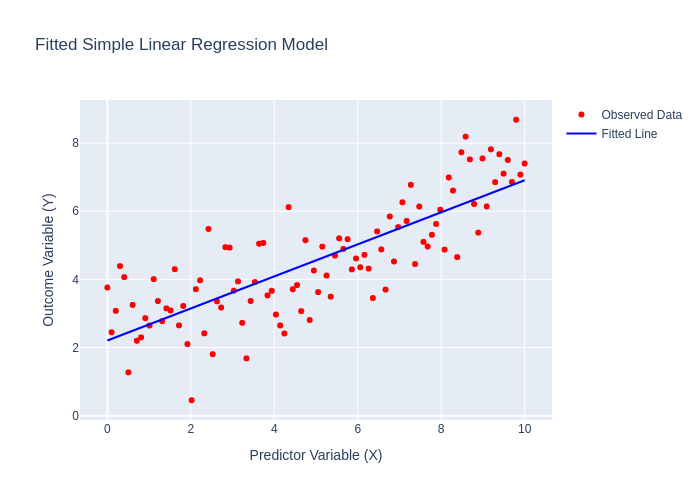

In [9]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf # provides high-level interface fo statistical models
# has built in diagnostics, statistical tests, etc. 

# Parameters for the model
np.random.seed(0)
beta_0 = 2
beta_1 = 0.5
sigma = 1.0

# Generate predictor variable (X) as random values
X = np.linspace(0, 10, 100)

# Calculate the true linear relationship without noise
Y_true = beta_0 + beta_1 * X

# Generate error term (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, size=X.shape)

# Calculate outcome variable (Y) by adding noise to the linear relationship
Y = Y_true + epsilon

# Step 1: Create a DataFrame with X and Y
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Fit the Simple Linear Regression model using statsmodels
model = smf.ols('Y ~ X', data=data).fit()
print(model.summary())  # Print the model summary

# Step 3: Add fitted values to the DataFrame
data['Y_fitted'] = model.fittedvalues

# Step 4: Visualize the data points and the fitted regression line using Plotly
fig = go.Figure()

# Add the observed data points (with noise)
fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], mode='markers', name='Observed Data', marker=dict(color='red')))

# Add the fitted regression line
fig.add_trace(go.Scatter(x=data['X'], y=data['Y_fitted'], mode='lines', name='Fitted Line', line=dict(color='blue')))

# Customize layout
fig.update_layout(
    title="Fitted Simple Linear Regression Model",
    xaxis_title="Predictor Variable (X)",
    yaxis_title="Outcome Variable (Y)"
)

# Show plot
fig.show(renderer='png')


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     927.0
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           9.36e-52
Time:                        17:24:06   Log-Likelihood:                -67.720
No. Observations:                 100   AIC:                             139.4
Df Residuals:                      98   BIC:                             144.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0023      0.096     20.965      0.0

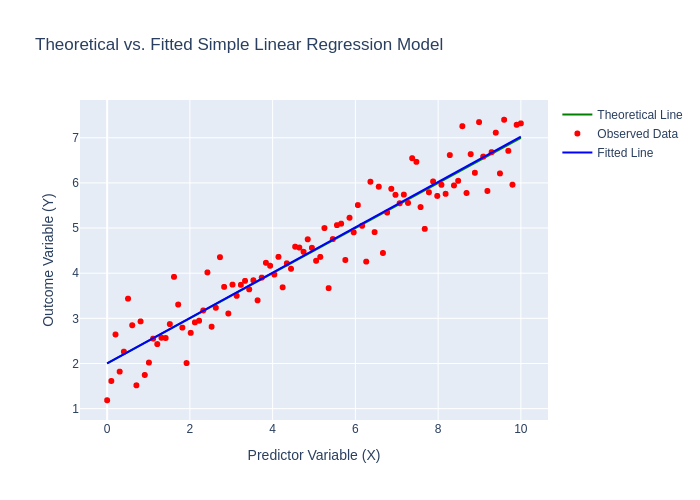

In [19]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Parameters for the theoretical model
np.random.seed()
beta_0 = 2      # True intercept
beta_1 = 0.5    # True slope
sigma = 1.0     # Standard deviation of the noise

# Generate predictor variable (X)
X = np.linspace(0, 10, 100)

# Calculate the theoretical true line without noise
Y_true = beta_0 + beta_1 * X

# Generate error term (epsilon) and add noise to create observed data points
epsilon = np.random.normal(0, sigma, size=X.shape)
Y = Y_true + epsilon  # This is our observed outcome variable

# Step 1: Create a DataFrame with X and Y (observed data)
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Fit the Simple Linear Regression model to the observed data
model = smf.ols('Y ~ X', data=data).fit()
print(model.summary())  # Print the model summary

# Step 3: Add the fitted values to the DataFrame
data['Y_fitted'] = model.fittedvalues

# Step 4: Visualize the theoretical line, observed data, and fitted line
fig = go.Figure()

# Add the theoretical line (true relationship, without noise)
fig.add_trace(go.Scatter(x=X, y=Y_true, mode='lines', name='Theoretical Line', line=dict(color='green')))

# Add the observed data points (with noise)
fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], mode='markers', name='Observed Data', marker=dict(color='red')))

# Add the fitted regression line
fig.add_trace(go.Scatter(x=data['X'], y=data['Y_fitted'], mode='lines', name='Fitted Line', line=dict(color='blue')))

# Customize layout
fig.update_layout(
    title="Theoretical vs. Fitted Simple Linear Regression Model",
    xaxis_title="Predictor Variable (X)",
    yaxis_title="Outcome Variable (Y)"
)

# Show plot
fig.show(renderer='png')


### 3. 
The theoretical line stays the same no matter how many times the code is run because is the actual representation of the data. However, the random sampling changes from trial to trial because it is random and subject to noise, and as a result, the fitted line also changes from trial to trial. Each time this data is re-run, there is a different result for the fitted line. When the variation is greater, there is more variety in the data set and this is reflected in our data spread. We may get a slightly different result for the fitted line because of noise/variation in the data. A line that lies very close to the theoretical line can be considered a more accurate representation of the population, while a line that is very different is likely fitted from data that is a less accurate representation of the population.

### 4. 
fitted_model.fittedvalues represents the predicted values of the dependent variable based on the independent variables and the estimated coefficients from the regression analysis. Statsmodels uses fitted_model.params, which contains a pandas series with the estimated values for the intercept and each predictor (in this case just one, B1). Then, the input values from the predictor values are gathered and this is put through the regression equation (which was constructed using the data for B0, B1, from fitted_model.params). This is repeated for all observations, and this information is stored in fitted_model.fittedvalues. This information represents the predicted values based on corresponding input values and the estimated coefficients.

Link to Chat: https://chatgpt.com/share/672a4b37-be08-800f-b55c-c09c7ebb43fc
Summary so far: 
    Here's a concise summary of how fitted_model.fittedvalues are derived based on fitted_model.params from a linear regression model:

Linear Regression Equation: The general equation is:

𝑌 = 𝛽0+𝛽1𝑋1+𝛽2𝑋2+…+𝛽𝑛𝑋𝑛+𝜖 where 𝑌 is the dependent variable, 𝑋𝑖 are the independent variables, and 𝛽𝑖 are the estimated coefficients.

Estimated Coefficients: The coefficients are accessed through fitted_model.params, which includes: Intercept (𝛽0) Slope coefficients for each predictor (𝛽1,𝛽2,...)

Fitted Values Calculation:

For each observation, substitute the predictor values into the regression equation:
𝑌 fitted = 𝛽0+𝛽1𝑋1+𝛽2𝑋2+…

This results in the predicted values for the dependent variable.
Storage in Fitted Values: The computed predicted outcomes for all observations are stored in fitted_model.fittedvalues, allowing for comparison with actual observed values to assess model performance.

In summary, fitted_model.fittedvalues provides the predicted values based on the regression model, calculated using the estimated coefficients for the predictor variables from fitted_model.params.

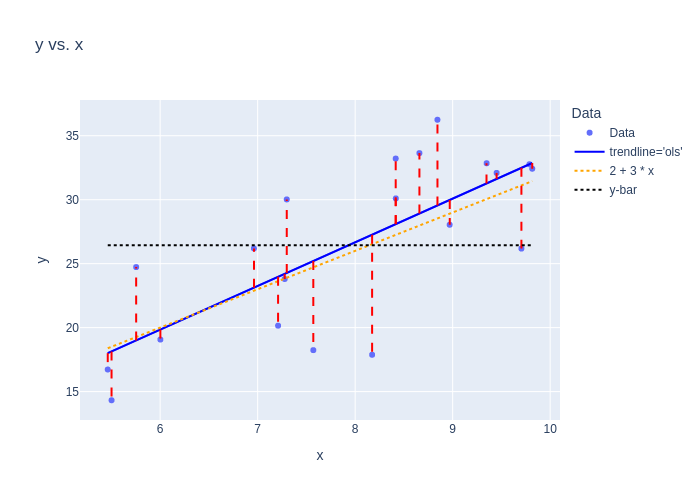

In [22]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Simulation parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
# Generate random data
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
y = beta0 + beta1 * x + errors  # Changed Y to y

# Create a DataFrame
df = pd.DataFrame({'x': x, 'y': y})  # Column name is now 'y'

# Fit the OLS model
model_data_specification = smf.ols("y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add a column for legend purposes
df['Data'] = 'Data'

# Create scatter plot with trendline
fig = px.scatter(df, x='x', y='y', color='Data', 
                 trendline='ols', title='y vs. x')

# Add OLS trendline
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Define the theoretical line
x_range_vals = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range_vals
fig.add_scatter(x=x_range_vals, y=y_line, mode='lines',
                name=str(beta0) + ' + ' + str(beta1) + ' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],  # Changed Y to y
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)

# Add horizontal line at y-bar
fig.add_scatter(x=x_range_vals, y=[df['y'].mean()] * 2, mode='lines',  # Changed Y to y
                line=dict(color='black', dash='dot'), name='y-bar')

# Show the figure
fig.show(renderer='png')  # Use fig.show(renderer="png") for submission


### 5. 
In the OLS model, the fitted line is chosen by minimizing the sum of squared differences between observed data points and values predicted by the linear mode. The resulting line gives the best linear approximation of the relationship between the dependent and independent variables. Squares are necessary to avoid negativity, as sometimes the difference will be positive and sometimes it will be negative. Also, it gives greater weight to larger errors making the method more sensitive to outliers. 

link: https://chatgpt.com/share/672a4b37-be08-800f-b55c-c09c7ebb43fc
summary:Here's a summary of our last two conversations:

Ordinary Least Squares (OLS) Method:

The OLS method selects the fitted line by minimizing the sum of squared differences (residuals) between observed data points and the predicted values of the linear model.
The term "squares" refers to squaring the residuals, which prevents cancellation of positive and negative differences and emphasizes larger errors. This makes the method sensitive to outliers.
In visualizations, the fitted line represents the best approximation of the data, while the dashed red lines indicate the residuals (distances from the observed points to the fitted line).
Plotting Code Adjustments:

You provided a code snippet for simulating data and fitting a linear regression model using OLS.
An error arose due to the discrepancy between the column names in the DataFrame and those used in the plotting function. Specifically, the dependent variable was originally named Y, but the plotting function expected y.
The code was corrected to change the column name from Y to y, ensuring all references matched. This allowed the plot to display correctly, and guidance was provided for rendering the figure as a PNG for submission.
Let me know if you'd like to explore any of these topics further!

### 6. 
The first expression computes the proportion of variance in the outcome variable Y that is explained by the model's predictions. The numerator gives the residual sum of squares, while the denominator gives the total sum of squares. 1-this gives the coefficient of determination, R^2. Fittedmodel.rsquared is the same thing as the calculation above, and thus quantifies how well the regression model can explain variability in Y. If there is little variability, then RSS/TSS will be very small, and the R^2 value will be close to 1, suggesting it is successful when attempting to explain variability. The third expression calculates the Pearson correlation coefficient between the observed values Y and predicted values froom the model. Squaring this value gives us the same r^2 value. The final expression gives the squared correlation between Y and the independent variable x, so the proportion of variance in Y that can be explaiend with the predictor x, seperate from the model. 

Link:https://chatgpt.com/share/672a641a-d4c4-800f-8dae-ac106c757100
Summary:Understanding Variance Explained by Models:

We discussed how a specific expression calculates the proportion of variance in the outcome variable Y that is explained by the regression model. This expression gives us a value known as the coefficient of determination, or R-squared.
Interpretation of Fitted Model R-squared:

The R-squared value from the fitted model quantifies how well the regression model explains the variability in Y. A higher R-squared value indicates better accuracy of the model.
Correlation Coefficients:

We explored how one expression calculates the squared correlation between the observed values of Y and the predicted values from the model. This squared correlation also corresponds to R-squared.
Another expression calculates the squared correlation between Y and the independent variable x, indicating the proportion of variance in Y that can be explained by x.
Summary of Relationships:

All these expressions help evaluate the performance and accuracy of regression models by quantifying how much variance is explained by the model and the relationships between the variables.

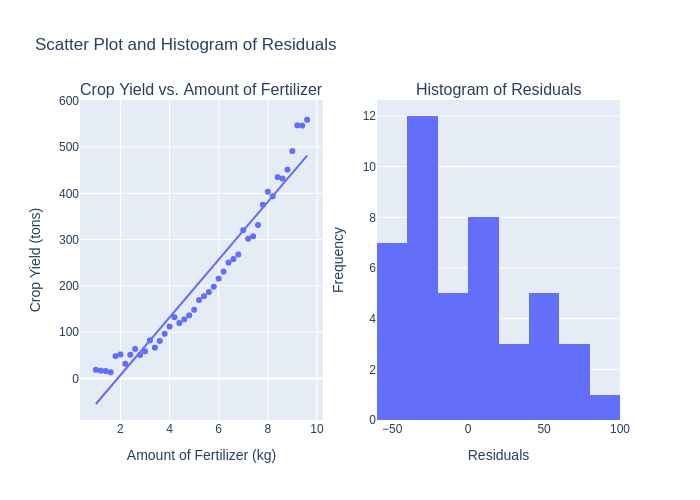

In [23]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


### 7.
The first assumption we often make it that the data is linear. In this case it doesn't appear to be perfectly linear, so maybe it would be a better idea to find a different model that fits this one better, perhaps a squared model? also, the residuals should be normally distributed but in this case they are skewed right. These would both make the linear regression model less accurate and help us determine that this data isn't a good fit to perform a linear regression on. 

Link:https://chatgpt.com/share/672a661a-3218-800f-b446-3ba2b619b5fa
Summary:
    Linear Regression Assumptions: We discussed the key assumptions underlying linear regression, which include:

Linearity
Independence of observations
Homoscedasticity
Normality of residuals
No multicollinearity
No significant outliers
Correct specification of the model
Dataset Analysis: You provided a dataset on the relationship between the amount of fertilizer used and crop yield. We explored how to assess whether the assumptions of linear regression hold for this dataset. Key points for evaluation include:

Linearity: Check for a linear relationship in the scatter plot.
Independence: Consider how the data was collected to ensure independence.
Homoscedasticity: Assess the residuals vs. fitted values for constant variance.
Normality of Residuals: Use the histogram of residuals to check for normality.
No Multicollinearity: Not a concern in simple linear regression.
No Significant Outliers: Identify outliers through visual inspection and influence measures.
Correct Specification: Ensure the model includes relevant predictors and is not missing important variables.
Conclusion: We emphasized the importance of validating these assumptions through diagnostic plots and statistical tests and discussed potential actions if violations are detected.

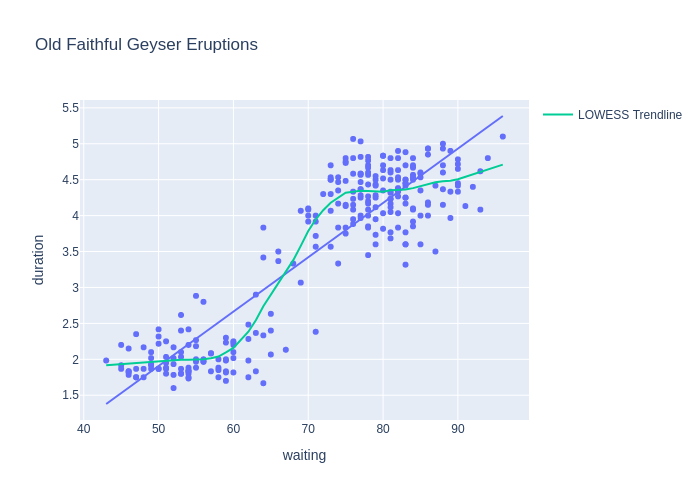

In [6]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 8 
The null hypothesis of "no linear association" would be that B1 is 0, so there's no correlation between the two variables. 

In the results below, the 95% confidence interval for the B1 value contains lower bound 0.071 and upper bound 0.080, which does not contain 0. That suggests that there is some correlation between the duration and the waiting time, so we should reject the null hypothesis. Another indicator that we should reject the null hypothesis is that the p-value is less than 0.05 (which is often used as a benchmark), so our results have a high likelihood of aligning with the population parameter. 

In [2]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:48:41   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 9 
For the group containing wait times less than 62, the 95% confidence interval for the B1 value for the linear regression contains 0, (ranges from -0.005 to 0.019) and has a p-value of 0.238, which indicates no evidence against the null hypothesis. Given these two results, we fail to reject the null hypothesis, as they both indicate a lack of evidence against it. 

For the group containing wait times less than 64, the 95% confidence interval for the B1 value for the lin regression does not contain 0, and ranges from 0.001 to 0.022. Also, it has a p-value of 0.036, indicating moderate evidence against the null hypothesis. Thus, we would reject the null hypothesis in favour of the alternative hypothesis, that there exists some relationship between the two variables. 

For the group containing wait times less than 66, the range of B1 is 0.010 to 0.034, and the p-value is 0.000 (rounded off), indicating very strong evidence against the null hypothesis. In this case, we would also reject the null hypothesis indicating some relationship between the two variables. 

Performing hypothesis testing on these three different groups reveals that there is no evidence against the null for the group less than 62 minutes, moderate evidence for less than 64 minutes, and strong for less than 66 minutes. 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


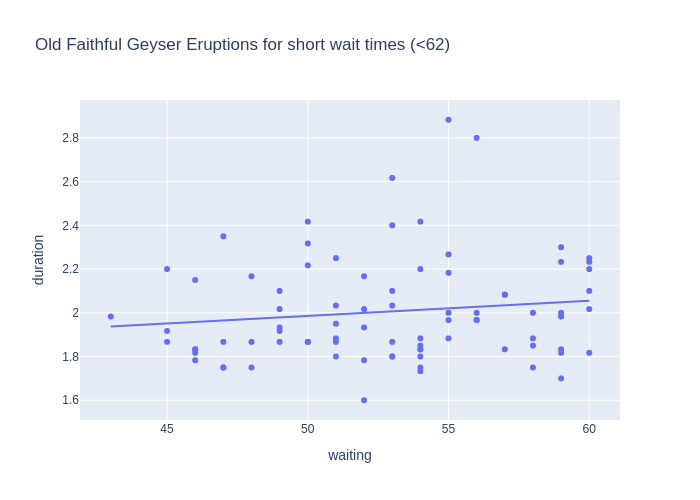

In [12]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


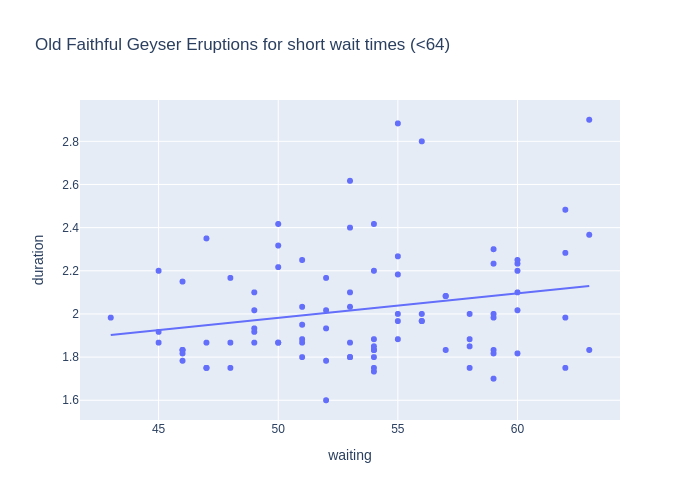

In [10]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


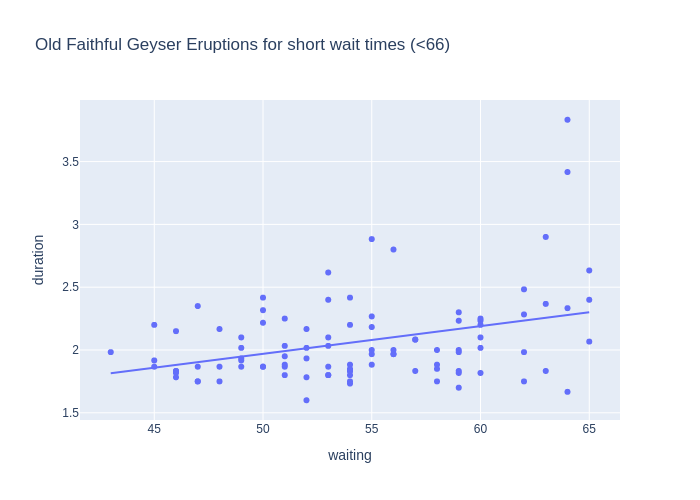

In [11]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 10

In [24]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer-'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


NameError: name 'renderer' is not defined

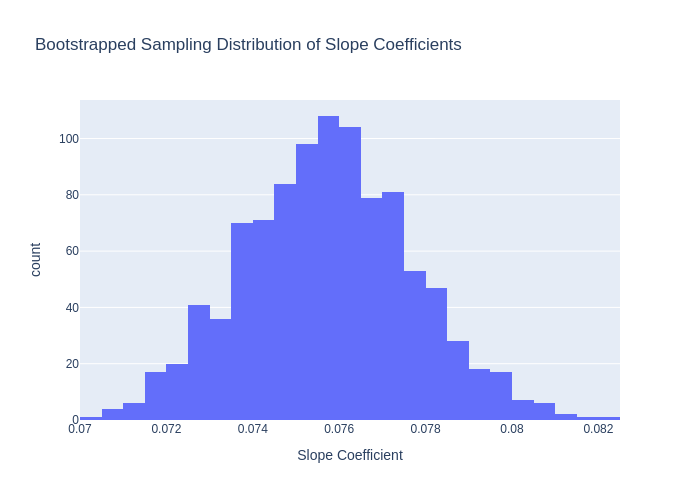

Bootstrap Mean Slope Coefficient: 0.07574134369084996
Bootstrap 95% CI for Slope Coefficient: [0.07193257 0.07979168]


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px

# Set the number of bootstrap samples
n_bootstraps = 1000
slope_coefficients = []

# Bootstrapping
for _ in range(n_bootstraps):
    # Resample the data with replacement
    boot_sample = old_faithful.sample(n=len(old_faithful), replace=True)
    
    # Fit a linear regression model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=boot_sample).fit()
    
    # Collect the slope coefficient (waiting coefficient)
    slope_coefficients.append(model.params['waiting'])

# Convert to a DataFrame for easier visualization
slope_df = pd.DataFrame(slope_coefficients, columns=['Slope Coefficient'])

# Visualize the distribution of the bootstrapped slope coefficients
fig = px.histogram(slope_df, x='Slope Coefficient', nbins=30, 
                   title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.show(renderer='png')  # Use `fig.show(renderer="png")` for static image submissions

# Display summary statistics for additional insight
print("Bootstrap Mean Slope Coefficient:", np.mean(slope_coefficients))
print("Bootstrap 95% CI for Slope Coefficient:", np.percentile(slope_coefficients, [2.5, 97.5]))


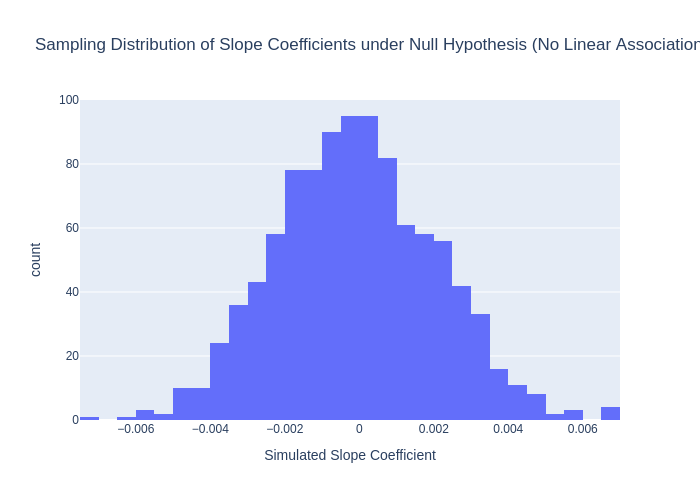

Simulated Mean Slope Coefficient (Null Hypothesis): -0.00010505483853535938
Simulated 95% CI for Slope Coefficient (Null Hypothesis): [-0.00409676  0.00411086]


In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px

# Parameters for the null hypothesis
beta_0 = 1.65
beta_1 = 0
sigma = 0.37
n = 160  # Sample size

# Define the 'waiting' values from the original Old Faithful dataset as x
x = old_faithful['waiting'].sample(n=n, replace=True).values

# Number of simulations
n_simulations = 1000
simulated_slope_coefficients = []

# Run simulations under the null hypothesis
for _ in range(n_simulations):
    # Generate y values based on the null model
    error = np.random.normal(0, sigma, n)
    y = beta_0 + beta_1 * x + error
    
    # Fit a Simple Linear Regression model to the simulated data
    simulated_data = pd.DataFrame({'waiting': x, 'duration': y})
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    
    # Collect the slope coefficient (for waiting)
    simulated_slope_coefficients.append(model.params['waiting'])

# Convert the results to a DataFrame for easier visualization
simulated_slope_df = pd.DataFrame(simulated_slope_coefficients, columns=['Simulated Slope Coefficient'])

# Plot the distribution of the simulated slope coefficients
fig = px.histogram(simulated_slope_df, x='Simulated Slope Coefficient', nbins=30,
                   title="Sampling Distribution of Slope Coefficients under Null Hypothesis (No Linear Association)")
fig.show(renderer='png')  # Use `fig.show(renderer="png")` for static image submissions

# Display summary statistics for additional insight
print("Simulated Mean Slope Coefficient (Null Hypothesis):", np.mean(simulated_slope_coefficients))
print("Simulated 95% CI for Slope Coefficient (Null Hypothesis):", np.percentile(simulated_slope_coefficients, [2.5, 97.5]))


In [16]:
smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


0 is not contained within the 95% confidence interval. Also, the simulated p-value does match the command above.

Link:https://chatgpt.com/share/672ad5b9-8310-800f-a7cd-8e23626b2ec7
    
Summary:Here’s a summary of our analysis steps and findings so far:

Objective: We are testing the null hypothesis that there is no linear association between waiting time until the next eruption and duration of the eruption for eruptions with waiting times longer than 71 minutes in the Old Faithful Geyser dataset.

Model Fitting on Filtered Data:

We fitted a Simple Linear Regression model to the subset of data with waiting times above 71 minutes and obtained the slope and its associated p-value.
The p-value from this model indicated whether the observed slope was statistically significant, allowing us to test if waiting was a meaningful predictor of duration for longer wait times.
Bootstrapping Under Null Hypothesis:

To assess the variability of the slope under the assumption of no linear association or slope beta1 equals zero we used bootstrapping. This involved:
Simulating samples from a Simple Linear Regression model where beta0 is 1 point 65 beta1 is 0 and sigma is 0 point 37.
Collecting the slope coefficients from 1000 simulated models to build a bootstrapped sampling distribution.
95 Percent Bootstrapped Confidence Interval:

We calculated the 95 percent confidence interval from the bootstrapped distribution of slope coefficients under the null hypothesis.
Goal: Check if the observed slope from the original filtered data falls within this interval. If it does it would suggest that the observed slope is not significantly different from what would be expected by chance supporting the null hypothesis.
Simulated p-value:

We computed a p-value based on the bootstrapped null distribution reflecting the proportion of slopes as extreme as or more extreme than the observed slope. This gives an empirical measure of how likely the observed slope is if there were no true association.
We then compared this simulated p-value with the p-value obtained from the original model fit.
Next Steps
Interpretation: The comparison of the observed slope with the 95 percent bootstrapped confidence interval and the consistency between the model-based and simulated p-values will guide our decision on rejecting or not rejecting the null hypothesis.
Conclusion: This will help us decide if there is sufficient evidence to conclude a significant linear association between waiting and duration for longer wait times in the geyser dataset.

### 11
The first model described by (smf.ols('duration ~ waiting', data=old_faithful) considers the entire data set and compares short and long wait times. The new model is split into two parts. One part,  (smf.ols('duration ~ waiting', data=old_faithful[short_wait])) only includes wait times less than 68. Conversely, the other model (smf.ols('duration ~ waiting', data=old_faithful[long_wait])) only looks at wait times of 69 or longer, so only considers larger wait times. Now, since we have added an indicator variable, this linear regression compares the contrast (differences) between the short group and the long group rather than comparing the entire data set. Everything under the short wait time for example, will receive a value of 0, and everything under the long wait time will receive a value of 1. This make sthe data less flexible to small changes, but gives a better overall idea of the big picture. It is a better representation if the data has a more obvious split, where one half has much smaller values and one half has much larger values. However, if the data has a more gradual change, it won't be reflected as clearly in this new model. 

To determine the evidence against a null hypothesis of 'no difference between groups', a statistical test must be done. This is completed in the code in the boxes below. The p-value retrieved was 0.000, which indicates very strong evidence against the null hypothesis. In this case we would reject the null hypothesis that there is no difference in favour of the alternative hypothesis, that there is a difference between these two groups. 

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


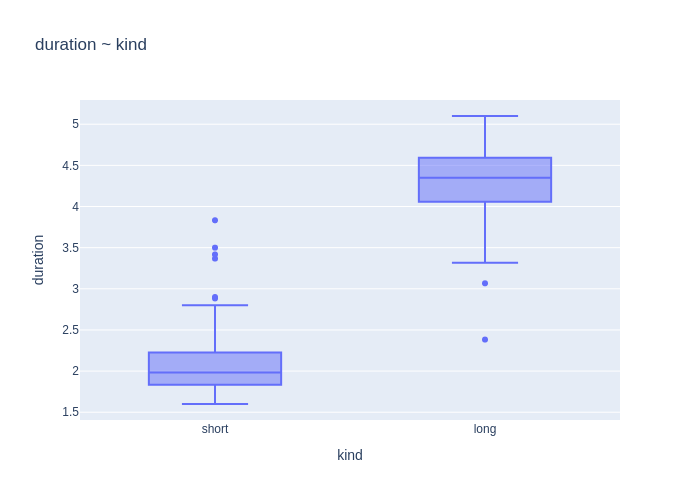

In [28]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [22]:
import statsmodels.formula.api as smf

# Fit the model with 'kind' as categorical (short/long)
model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the summary table to find p-value for 'kind[T.long]'
print(model.summary())

# Extract p-value for the 'long' group comparison (index [1] corresponds to 'kind[T.long]')
p_value = model.pvalues['C(kind, Treatment(reference="short"))[T.long]']

# Hypothesis testing decision
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between 'short' and 'long' wait times.")
else:
    print("Fail to reject the null hypothesis: No significant difference between 'short' and 'long' wait times.")


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        02:46:25   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Link:https://chatgpt.com/share/672ad96e-2590-800f-aba6-674810a653db
Summary:We are investigating the difference in duration based on wait_time categorized as "short" (less than 68 minutes) and "long" (68 minutes or more) using a simple linear regression model. We create a new indicator variable called kind to classify wait_time as either "short" or "long".

The model compares the "long" group to the "short" group using "short" as the reference category. The null hypothesis is that there is no difference in duration between the two groups. If the p-value for the coefficient of kind[T.long] is less than 0.05, we reject the null hypothesis, indicating a significant difference in mean duration between the groups.

A box plot is used to visualize the distribution of duration for each group. From the regression, the coefficient for kind[T.long] represents the difference in mean duration between the "long" and "short" groups. If the p-value is less than 0.05, we conclude that there is a statistically significant difference between the two groups.

### 12
Only the first histogram suggests plausibility of the assumption that the distribution of error terms is normal. The Second model has data that is skewed right and not centered at 0, the third model has data that is skewed left, and the last model has a few outliers on the left and right side. 

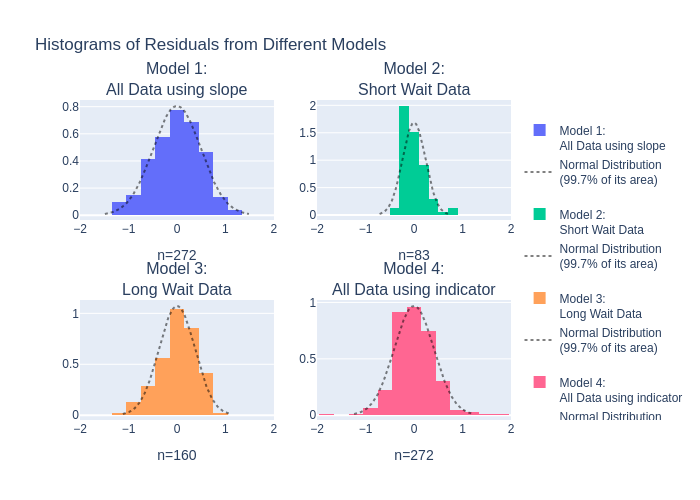

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### 13
a) The permutation test involves shuffling the statistics from both categories to see what the data would look like if there was truly no difference between the two groups. If the difference from the actual data set and the shuffled data sets are significantly different, then it can be said that the two sets have some significant difference. The bootstrapping works by resampling the difference between them multiple times (typical bootstrapping) and creating a distribution of differences for this data. Then the 95% confidence interval is determined from this data. 

b) the permutation method is more focused on hypothesis testing, comparing a null to the actual data set, while the bootstrapping is more focused on constructing a confidence interval.These models both have more flexibility than the indicator model, which groups all the data into two seperate groups and performs hypothesis testing that way. 

In [33]:
# permutation test 
import numpy as np
import pandas as pd

# Assuming 'old_faithful' DataFrame with 'wait_time', 'duration', and 'kind' column already created

# 1. Calculate the observed test statistic (difference in means)
observed_statistic = old_faithful.groupby('kind')['duration'].mean().diff().iloc[1]

# 2. Permutation test
n_permutations = 10000
permuted_statistics = []

# Run the permutations
for _ in range(n_permutations):
    # Shuffle the 'kind' labels (the indicator variable)
    permuted_kind = np.random.permutation(old_faithful['kind'])
    
    # Assign the permuted values back to the DataFrame and calculate the test statistic
    old_faithful['permuted_kind'] = permuted_kind
    permuted_statistic = old_faithful.groupby('permuted_kind')['duration'].mean().diff().iloc[1]
    permuted_statistics.append(permuted_statistic)

# 3. Calculate p-value: fraction of permuted statistics greater than or equal to the observed statistic
p_value = np.mean(np.abs(permuted_statistics) >= np.abs(observed_statistic))

# 4. Print the result
print(f"Observed Test Statistic: {observed_statistic}")
print(f"P-value from permutation test: {p_value}")


Observed Test Statistic: -2.20360023255814
P-value from permutation test: 0.0


In [34]:
# creating 95% bootstrap confidence interval 
import numpy as np
import pandas as pd

# Assuming 'old_faithful' DataFrame with 'kind' and 'duration' already created

# Separate the data into short and long groups
short_group = old_faithful[old_faithful['kind'] == 'short']['duration']
long_group = old_faithful[old_faithful['kind'] == 'long']['duration']

# Number of bootstrap samples
n_bootstrap = 10000

# Store the bootstrapped mean differences
bootstrapped_mean_differences = []

# Perform bootstrapping
for _ in range(n_bootstrap):
    # Sample with replacement from each group
    short_sample = np.random.choice(short_group, size=len(short_group), replace=True)
    long_sample = np.random.choice(long_group, size=len(long_group), replace=True)
    
    # Calculate the mean difference between the two bootstrapped samples
    mean_difference = np.mean(long_sample) - np.mean(short_sample)
    
    # Store the mean difference
    bootstrapped_mean_differences.append(mean_difference)

# Convert the list to a numpy array for easier computation of quantiles
bootstrapped_mean_differences = np.array(bootstrapped_mean_differences)

# Calculate the 95% confidence interval using np.quantile
ci_lower, ci_upper = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Print the results
print(f"95% Bootstrap Confidence Interval for the difference in means: ({ci_lower}, {ci_upper})")


95% Bootstrap Confidence Interval for the difference in means: (2.1027187151162785, 2.2993676337209306)


Link: https://chatgpt.com/share/672ad96e-2590-800f-aba6-674810a653db

Summary: You have explored three methods for comparing the difference in means between two groups ("short" and "long" wait times): indicator variable-based model, permutation test, and bootstrap confidence interval. Here's a concise summary of each approach, how they compare, and their key differences:

Indicator Variable-Based Model:

Parametric method: Assumes a linear relationship between the predictor (kind) and outcome (duration) and normal residuals.
Focus: Tests the significance of the difference in means between the groups using a t-test derived from a linear regression model.
Assumptions: Relies on the assumption of normality and homoscedasticity (equal variances across groups).
Outcome: Provides a point estimate for the difference in means and a p-value for statistical significance.
Permutation Test:

Non-parametric method: Does not rely on any distributional assumptions (e.g., normality).
Focus: Tests the null hypothesis of no difference between groups by reshuffling the data and comparing the observed test statistic to a distribution generated through random permutations.
Assumptions: None about the underlying data distribution.
Outcome: Provides a p-value based on the distribution of test statistics generated by reshuffling.
Bootstrap Confidence Interval:

Non-parametric method: Like the permutation test, it avoids assumptions about the data distribution.
Focus: Estimates the uncertainty around the difference in means by resampling the data with replacement, generating many bootstrapped samples, and calculating a confidence interval for the mean difference.
Assumptions: None about the underlying data distribution.
Outcome: Provides a 95% confidence interval for the difference in means.
Comparison:
Parametric vs Non-Parametric: The indicator variable-based model is parametric and assumes normality, whereas the permutation test and bootstrap method are non-parametric, making them more flexible and robust to violations of assumptions.
Hypothesis Testing vs Estimation: The model-based approach focuses on testing the significance of the difference (via p-value), while the permutation and bootstrap methods focus on estimating the uncertainty around the difference (via p-value and confidence intervals).
Flexibility: The permutation and bootstrap methods are more flexible, as they do not require assumptions about the data distribution or model form. The indicator variable-based model is less flexible because it depends on specific assumptions, such as linearity and normality.
These methods offer complementary approaches depending on the context, with the model-based approach being more traditional and assumption-dependent, and the permutation and bootstrap methods offering robust, assumption-free alternatives.